In [1]:
# Import data analysis and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [67]:
# Read the dataset
emails = pd.read_csv('emails.csv')
print('Type of read object is: ',type(emails),'\n\n')
emails.info()
# Now remove whitespaces in the column-names
emails.columns = emails.columns.str.strip()

Type of read object is:  <class 'pandas.core.frame.DataFrame'> 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [68]:
print('Columns of dataset are: ',emails.columns)
print('\nSize of our dataset is: ',emails.shape)
emails

Columns of dataset are:  Index(['text', 'spam'], dtype='object')

Size of our dataset is:  (5728, 2)


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [69]:
emails.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [70]:
# Adding a length column to our dataframe 
# Check whether the length of message can be distinguishing attrb for spam filtering....
emails['length'] = emails['text'].apply(len)
print('Shape of our dataset becomes: ',emails.shape)
print('\nColumns of our dataset now are: ',emails.columns,'\n\n')
print(emails.info())
emails.describe()

Shape of our dataset becomes:  (5728, 3)

Columns of our dataset now are:  Index(['text', 'spam', 'length'], dtype='object') 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 3 columns):
text      5728 non-null object
spam      5728 non-null int64
length    5728 non-null int64
dtypes: int64(2), object(1)
memory usage: 134.3+ KB
None


,spam,length
count,5728.000000,5728.000000
mean,0.238827,1556.768680
std,0.426404,2042.649812
min,0.000000,13.000000
25%,0.000000,508.750000
50%,0.000000,979.000000
75%,0.000000,1894.250000
max,1.000000,43952.000000


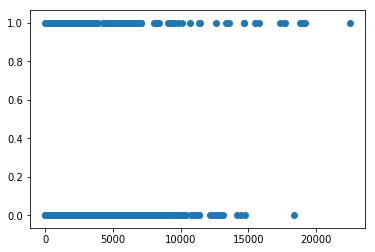

In [84]:
plt.scatter(emails['length'], emails['spam'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23644c82e48>,
 'caps': [<matplotlib.lines.Line2D at 0x236456da5f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23641286898>],
 'medians': [<matplotlib.lines.Line2D at 0x236451c4c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x23645774860>],
 'means': []}

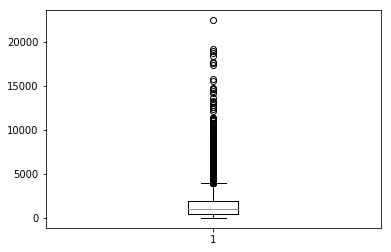

In [81]:
# Box plot helps us to find the outliers
# Length column has outliers which should be reomved before we create model
plt.boxplot(emails['length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23649a39048>,
 'caps': [<matplotlib.lines.Line2D at 0x2364a4adb38>,
 'boxes': [<matplotlib.lines.Line2D at 0x23649a39630>],
 'medians': [<matplotlib.lines.Line2D at 0x2364a5f4550>],
 'fliers': [<matplotlib.lines.Line2D at 0x23649e5e748>],
 'means': []}

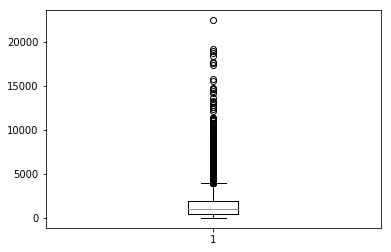

In [82]:
# So, remove those entries whose length is greater than 27000...
emails = emails[emails['length']<27000]
plt.boxplot(emails['length'])

In [8]:
# Dropping text column along column axis (default is 0:row axis)
# df = emails.drop('text', axis=1)

In [85]:
emails.groupby('spam').describe()
# So, as per our dataset there are 4360 non-spam messages
# and 1368 spam messages

length                                                                
       count         mean          std   min    25%     50%     75%      max
spam                                                                        
0     4356.0  1599.691001  1631.733291  13.0  576.5  1121.5  2035.0  18375.0
1     1367.0  1297.422092  2150.417951  18.0  401.0   693.0  1243.0  22476.0

In [86]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5723 entries, 0 to 5727
Data columns (total 3 columns):
text      5723 non-null object
spam      5723 non-null int64
length    5723 non-null int64
dtypes: int64(2), object(1)
memory usage: 178.8+ KB


In [100]:
def process_text(text):
    my_str = [c for c in text if c not in string.punctuation]
    my_str = ''.join(my_str)
    #print(len(my_str))
    msg=[word for word in my_str.split() if word.lower() not in stop_words.ENGLISH_STOP_WORDS]
    return " ".join(msg)
print('Before removing punc and stopwords: ',len(emails['text'][0]))
print('After removing punc and stopwords: ',len(process_text(emails['text'][0])))

Before removing punc and stopwords:  1484
After removing punc and stopwords:  829


In [89]:
vectorizer = TfidfVectorizer('english')
message = vectorizer.fit_transform(emails)
msg_train, msg_test, label_train, label_test =train_test_split(emails['text'], emails['spam'], test_size=0.2, random_state=42)

In [90]:
todo_models = [RandomForestClassifier(max_depth=6), LogisticRegression(), MultinomialNB(), SVC()]
model_names = ['RandomForestClassifier','LogisticRegression', 'MultinomialNB', 'SVC(Support Vector Machines)']
i=0
for model in todo_models:
    pipeline = Pipeline([('baggingWords', CountVectorizer(analyzer=process_text)),
                         ('tfidf', TfidfTransformer()),
                         ('classifier', model)])
    pipeline.fit(msg_train, label_train)
    pred = pipeline.predict(msg_test)
    print('Model : ',model_names[i],'\n')
    i+=1
    print('Accuracy score is:',accuracy_score(label_test,pred),'\n')
    print('Confusion matrix is:\n',confusion_matrix(label_test,pred),'\n')
    #print('Classification report is: \n',classification_report(label_test,pred),'\n')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model :  RandomForestClassifier 

Accuracy score is: 0.8427947598253275 

Confusion matrix is:
 [[842  10]
 [170 123]] 



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model :  LogisticRegression 

Accuracy score is: 0.8200873362445414 

Confusion matrix is:
 [[833  19]
 [187 106]] 

Model :  MultinomialNB 

Accuracy score is: 0.7441048034934498 

Confusion matrix is:
 [[852   0]
 [293   0]] 



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model :  SVC(Support Vector Machines) 

Accuracy score is: 0.7441048034934498 

Confusion matrix is:
 [[852   0]
 [293   0]] 



In [ ]:
spam = pd.D